In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import zipfile

In [43]:
with zipfile.ZipFile("datasets/train.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets")

with zipfile.ZipFile("datasets/test.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets")

In [44]:
# Loading dataset
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [45]:
print('train:', train.shape)
print('test:', test.shape)
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

train: (42000, 785)
test: (28000, 784)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [47]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [48]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

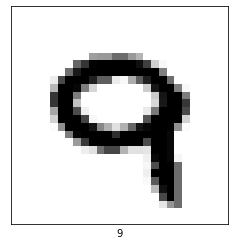

In [49]:
i=100
plt.figure(figsize=(4,4))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_train_re[i], cmap=plt.cm.binary)
plt.xlabel(y_train_re[i])
plt.show()

In [50]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

In [51]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [52]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [54]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [55]:
training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re))
print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 19s 17ms/step - loss: 0.2916 - accuracy: 0.9097 - val_loss: 0.0883 - val_accuracy: 0.9735
Epoch 2/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0929 - accuracy: 0.9718 - val_loss: 0.0652 - val_accuracy: 0.9801
Epoch 3/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0616 - val_accuracy: 0.9815
Epoch 4/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0599 - val_accuracy: 0.9823
Epoch 5/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0522 - val_accuracy: 0.9856
Epoch 6/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0510 - val_accuracy: 0.9852
Epoch 7/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0508 -

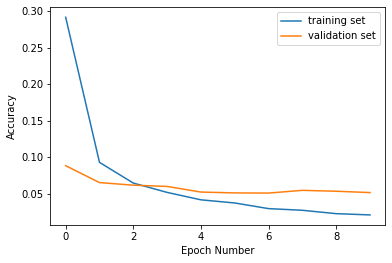

In [56]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

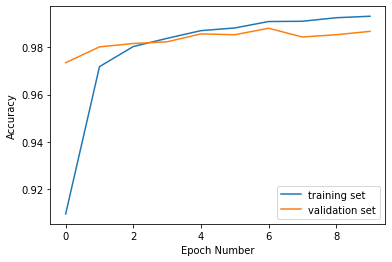

In [57]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [58]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [59]:
loaded_model = tf.keras.models.load_model(model_name)